In [ ]:
#BITCOIN DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'/Users/silviyasingh/Downloads/bitcoin_price_Training - Training (1).csv')

In [4]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [6]:
df.shape

(1556, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [13]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [16]:
df['Date'] = df['Date'].astype('datetime64[ns]')

#pd.to_datetime()

In [17]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [18]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [19]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [25]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [28]:
data = df.sort_index(ascending = False).reset_index()

In [30]:
data.drop('index' , axis=1, inplace=True)

In [31]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

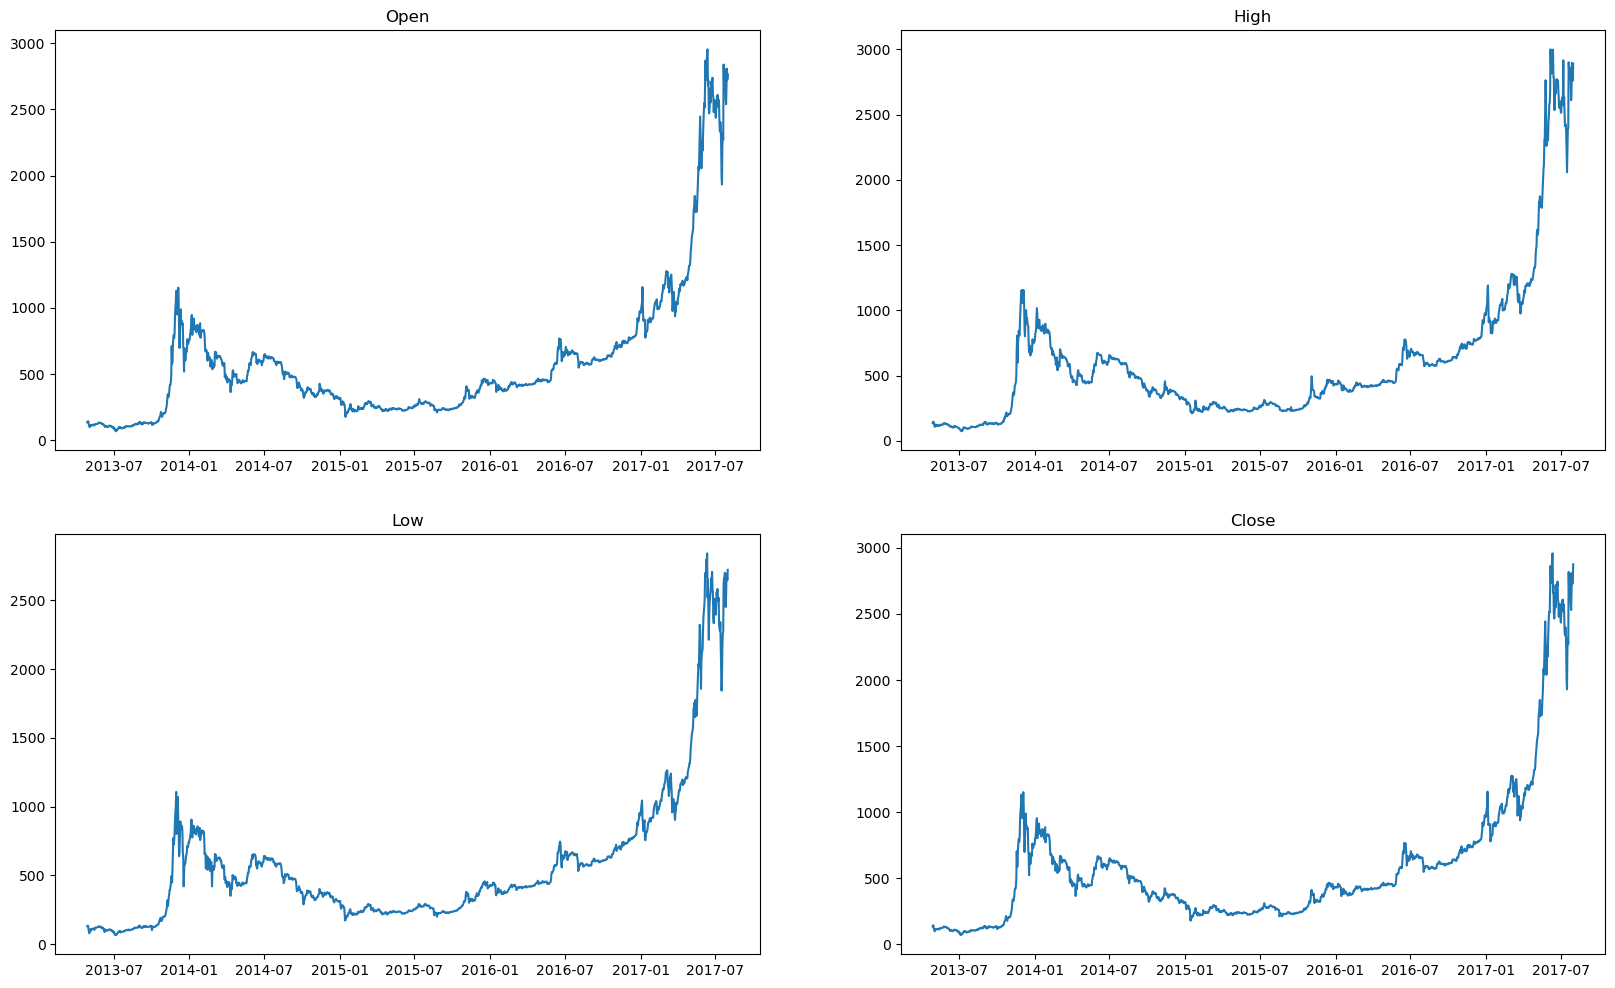

In [33]:
plt.figure(figsize=(20,12))

for index , col in enumerate(['Open', 'High', 'Low', 'Close'] , 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'] , df[col])
    plt.title(col)

In [34]:
data.shape

(1556, 7)

In [35]:
bitcoin_sample = data[0:50]

In [ ]:
!pip install chart_studio
!pip install plotly

In [43]:
import chart_studio.plotly as py

import plotly.graph_objs as go

import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [45]:
init_notebook_mode(connected=True)

In [54]:
trace = go.Candlestick(x=bitcoin_sample['Date'] ,
              high = bitcoin_sample['High'] ,
              open = bitcoin_sample['Open'] ,
              close = bitcoin_sample['Close'] ,
              low = bitcoin_sample['Low'])

In [57]:
candle_data = [trace]

layout = {
    'title' : 'Bitcoin Historical Price' ,
    'xaxis' : {'title' : 'Date'}
}

In [58]:
fig = go.Figure(data = candle_data , layout = layout)

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [61]:
data['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<Axes: >

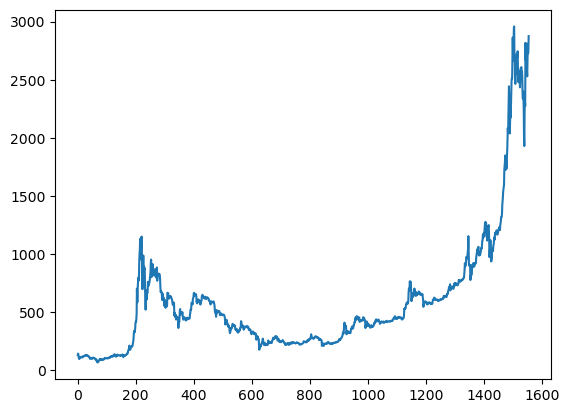

In [60]:
data['Close'].plot()

In [63]:
data.set_index('Date' , inplace = True)

In [65]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

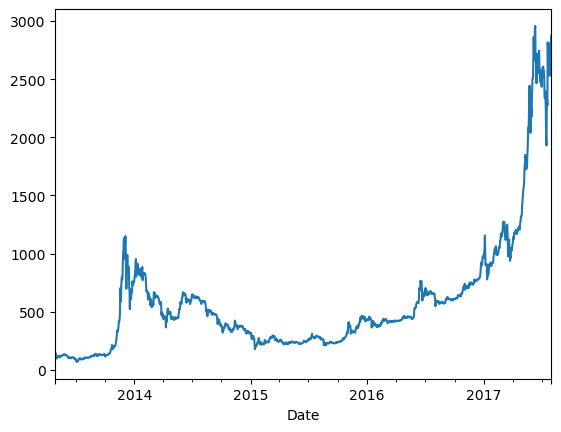

In [66]:
data['Close'].plot()


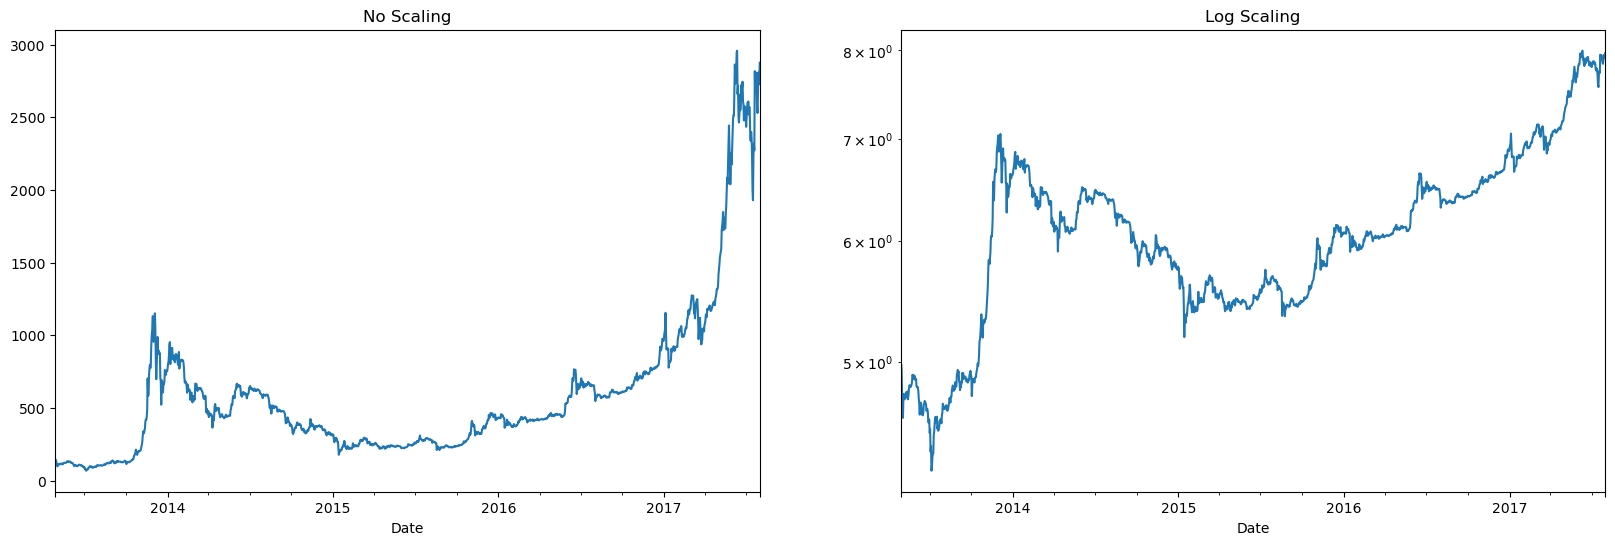

In [70]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log Scaling')
plt.yscale('log')

In [71]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [72]:
data.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"


In [81]:
data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

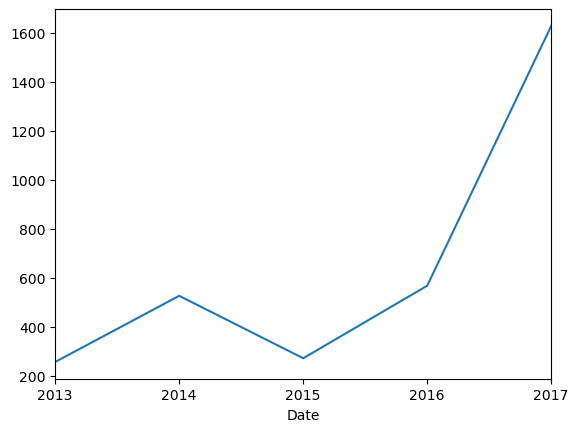

In [83]:
data['Close'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

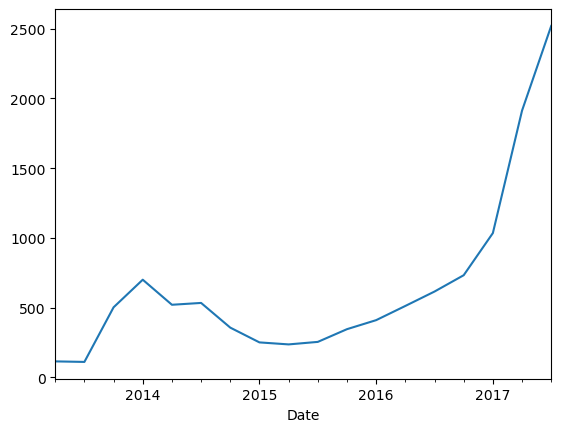

In [84]:
data['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

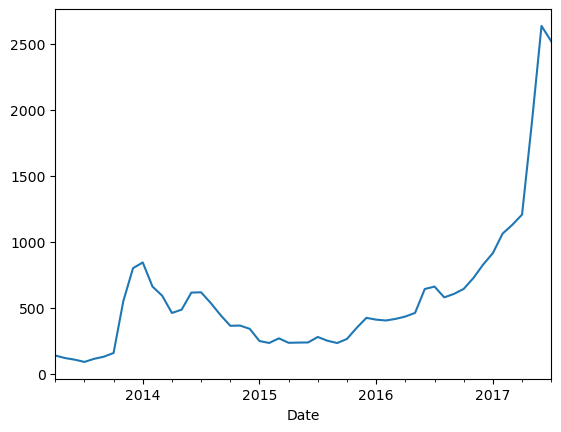

In [85]:
data['Close'].resample('M').mean().plot()

In [87]:
data['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [90]:
data['Close_price_pct_change'] = data['Close'].pct_change()*100

In [91]:
data['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

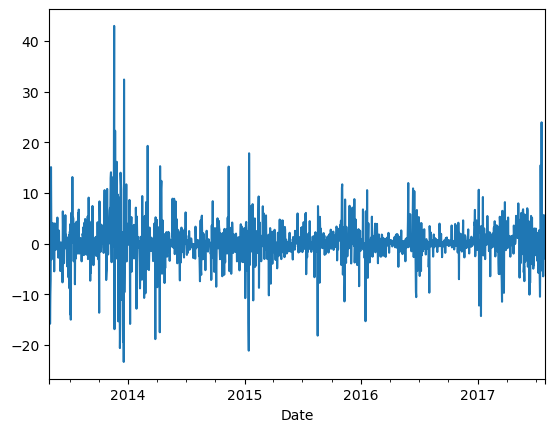

In [92]:
data['Close_price_pct_change'].plot()

In [109]:
import chart_studio.plotly as py

import plotly.graph_objs as go

import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)

In [ ]:
import cufflinks as cf

In [ ]:
cf.go_offline()

In [114]:
data['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

In [115]:
type(data['Close_price_pct_change'])

pandas.core.series.Series

In [ ]:
data['Close_price_pct_change'].iplot()